In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape
y_train.shape

(34799,)

7

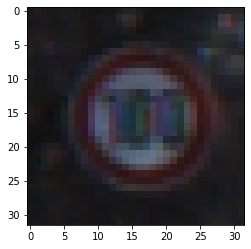

In [5]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

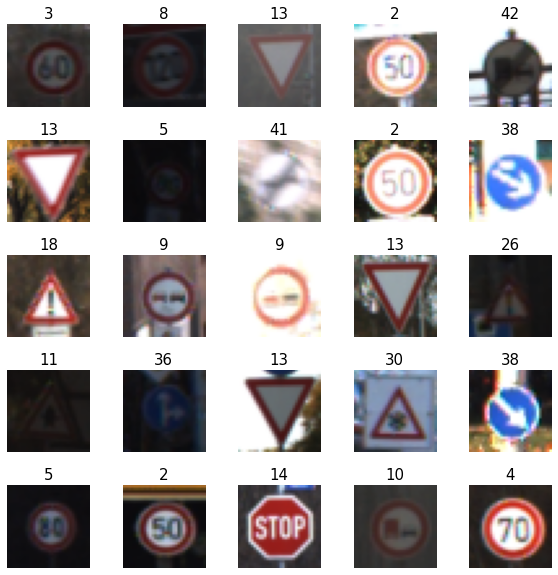

In [6]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    plt.subplots_adjust(hspace = 0.4)
       
    

        

In [7]:
#CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [16]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [17]:
X_train_gray.shape
X_train_gray_norm = (X_train_gray - 128)/128

X_test_gray_norm = (X_test_gray - 128)/128

In [10]:
X_train_gray_norm

array([[[[-0.796875  ],
         [-0.79427083],
         [-0.85416667],
         ...,
         [-0.91145833],
         [-0.91666667],
         [-0.91145833]],

        [[-0.8046875 ],
         [-0.8046875 ],
         [-0.8359375 ],
         ...,
         [-0.91927083],
         [-0.91666667],
         [-0.91927083]],

        [[-0.78645833],
         [-0.77864583],
         [-0.80989583],
         ...,
         [-0.91927083],
         [-0.91666667],
         [-0.91666667]],

        ...,

        [[-0.88541667],
         [-0.875     ],
         [-0.88020833],
         ...,
         [-0.91927083],
         [-0.92447917],
         [-0.91927083]],

        [[-0.88541667],
         [-0.875     ],
         [-0.87239583],
         ...,
         [-0.91927083],
         [-0.92708333],
         [-0.91927083]],

        [[-0.8828125 ],
         [-0.875     ],
         [-0.86979167],
         ...,
         [-0.91927083],
         [-0.92708333],
         [-0.91927083]]],


       [[[ 0.9921875 ],


In [11]:
X_validation_gray = np.sum(X_valid/3, axis = 3, keepdims = True)
X_validation_gray_norm = (X_validation_gray - 128)/128

X_validation_gray_norm.shape
X_validation_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


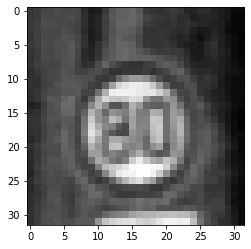

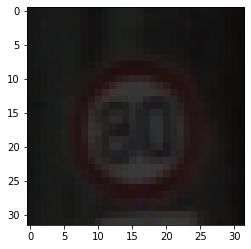

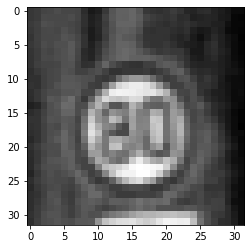

In [12]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [13]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [14]:
history = CNN.fit(X_train_gray_norm, y_train, batch_size = 500, epochs = 50, verbose = 1, validation_data = (X_validation_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 12s 173ms/step - loss: 3.5151 - accuracy: 0.0956 - val_loss: 2.9272 - val_accuracy: 0.2560
Epoch 2/50
70/70 [==============================] - 13s 189ms/step - loss: 2.2604 - accuracy: 0.3868 - val_loss: 1.5656 - val_accuracy: 0.5649
Epoch 3/50
70/70 [==============================] - 10s 148ms/step - loss: 1.2412 - accuracy: 0.6402 - val_loss: 1.0227 - val_accuracy: 0.6937
Epoch 4/50
70/70 [==============================] - 10s 148ms/step - loss: 0.8327 - accuracy: 0.7560 - val_loss: 0.8182 - val_accuracy: 0.7478
Epoch 5/50
70/70 [==============================] - 11s 159ms/step - loss: 0.6642 - accuracy: 0.8076 - val_loss: 0.7242 - val_accuracy: 0.7787
Epoch 6/50
70/70 [==============================] - 10s 150ms/step - loss: 0.5536 - accuracy: 0.8412 - val_loss: 0.6566 - val_accuracy: 0.8093
Epoch 7/50
70/70 [==============================] - 11s 150ms/step - loss: 0.4909 - accuracy: 0.8600 - val_loss: 0.5807 - val_accuracy: 0.8234

In [18]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.6888 - accuracy: 0.8963
Test Accuracy: 0.8962786793708801


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Train and Valid loss')

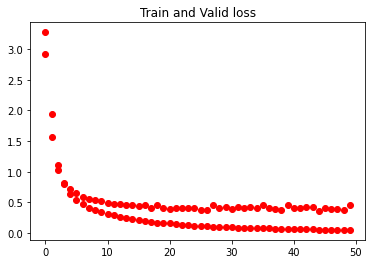

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training')
plt.plot(epochs, val_loss, 'ro', label = 'Validation loss')
plt.title('Train and Valid loss') 

Text(0.5, 1.0, 'Train and Valid accuracy')

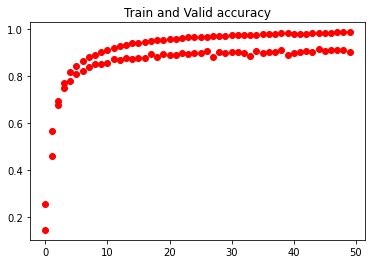

In [25]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training')
plt.plot(epochs, val_accuracy, 'ro', label = 'Validation acc')
plt.title('Train and Valid accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

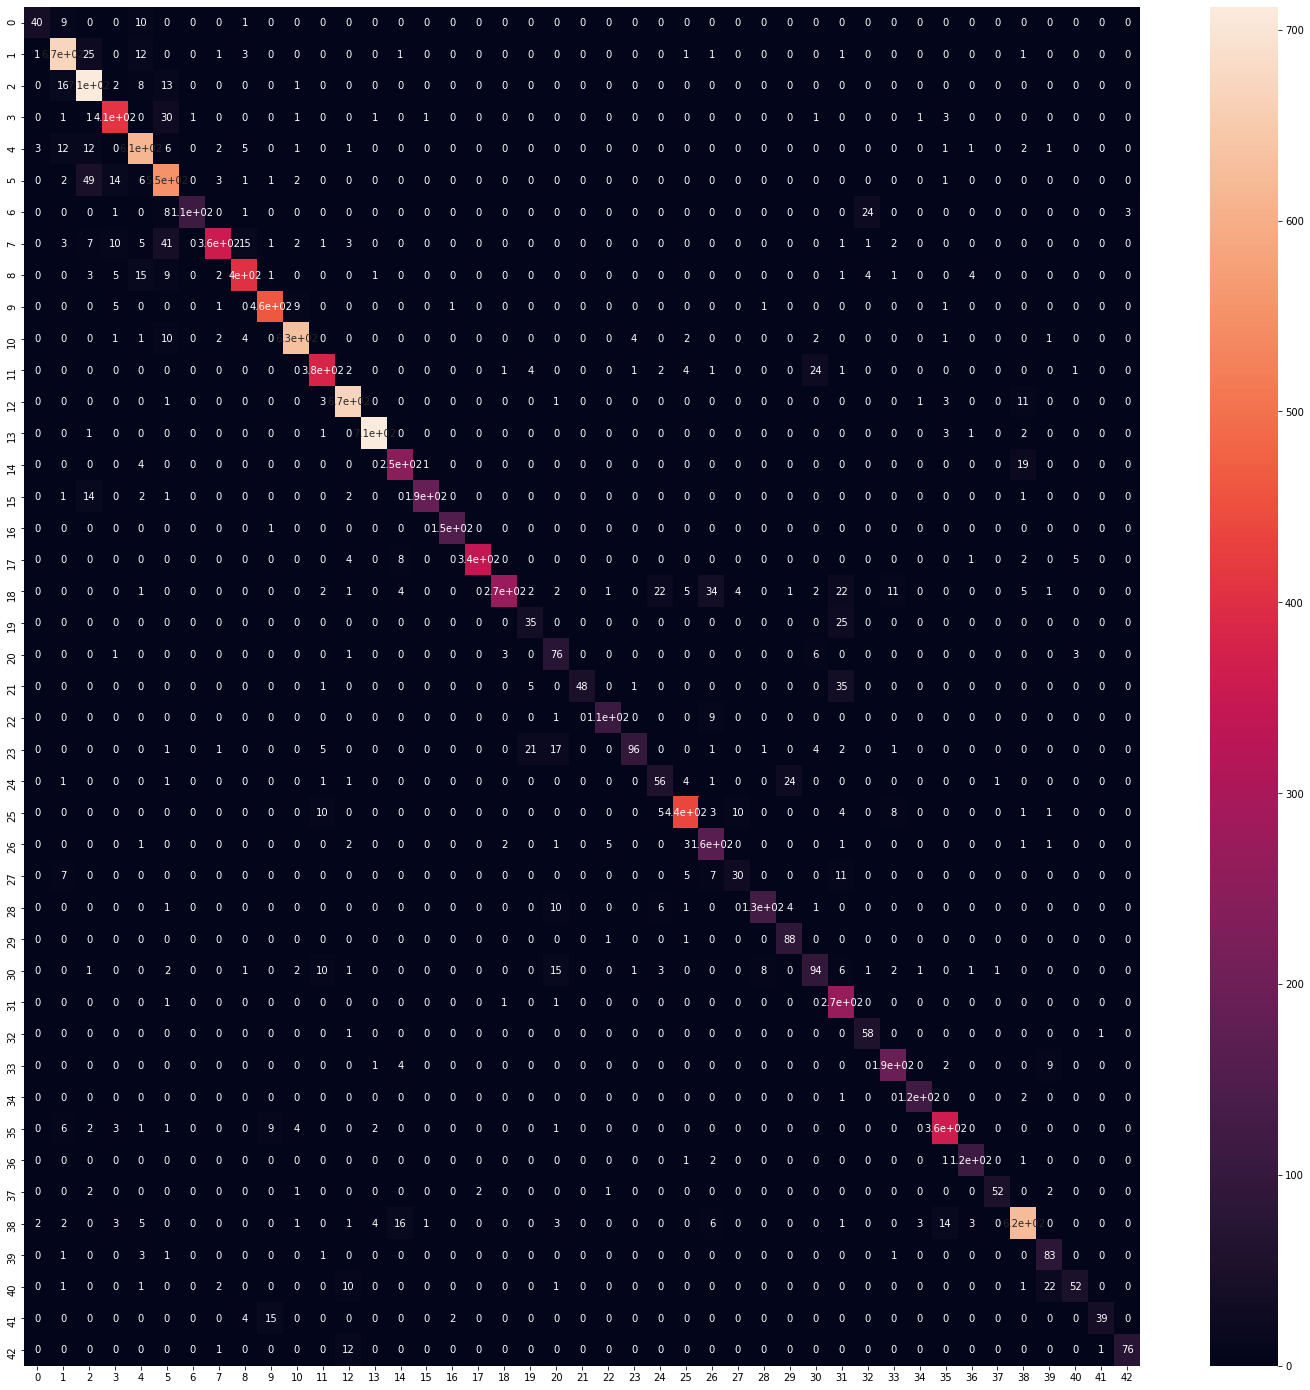

In [26]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

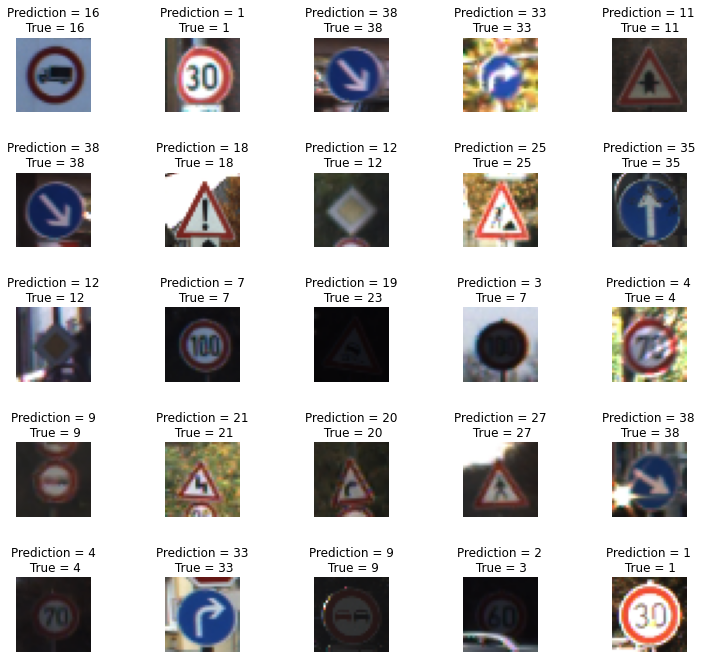

In [27]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    